In [3]:
max_sequence_length = 10
d_model = 6    # 512

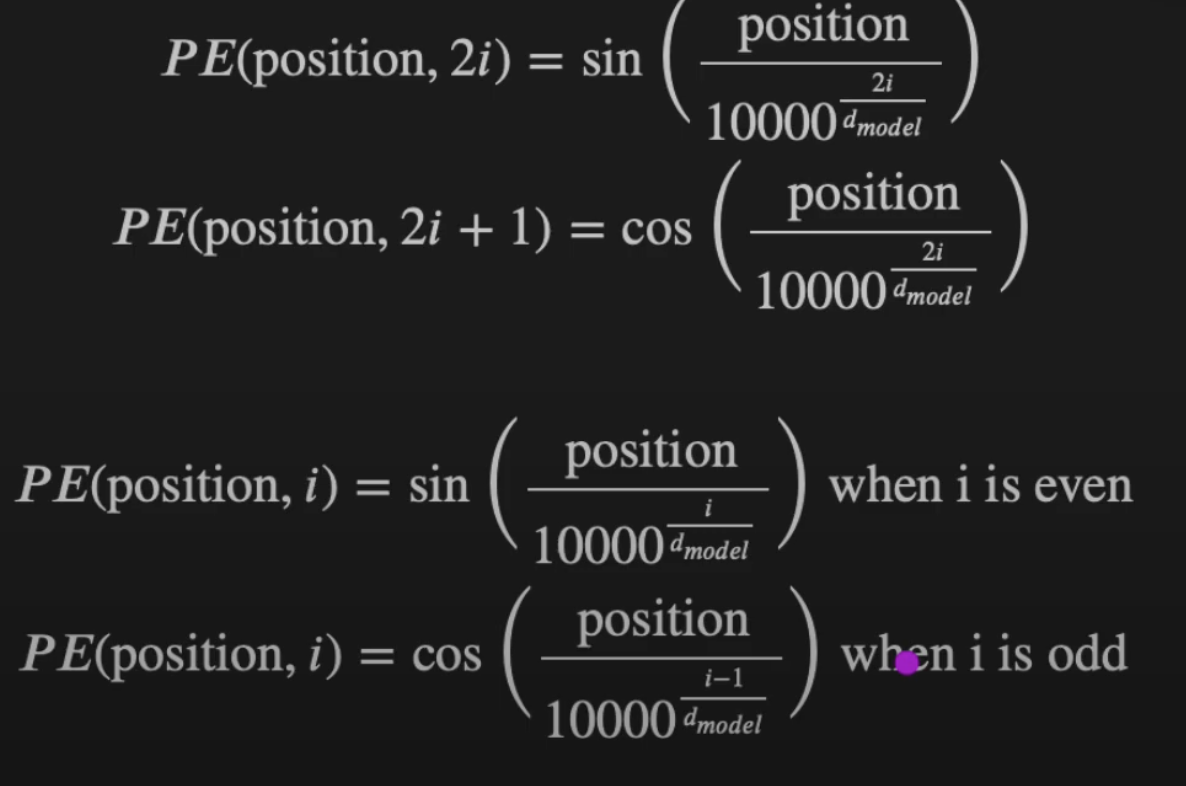 

In [4]:
even_i = torch.arange(0,d_model,2).float()
even_i

tensor([0., 2., 4.])

In [5]:
even_denominator = 10000**(even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [8]:
odd_i = torch.arange(1,d_model+1,2).float()
odd_i

tensor([1., 3., 5.])

In [10]:
odd_denominator = 10000**((odd_i-1)/d_model)
odd_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [12]:
denominator = 10000**(even_i/d_model)
denominator

tensor([  1.0000,  21.5443, 464.1590])

In [14]:
position = torch.arange(max_sequence_length , dtype = torch.float).reshape(max_sequence_length,1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [15]:
even_PE = torch.sin(position/even_denominator)
odd_PE = torch.cos(position/odd_denominator)

In [16]:
even_PE  # (max_sequence_length, d_model/2) = (10, 3)

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [17]:
odd_PE  # (max_sequence_length, d_model/2) = (10, 3)

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [21]:
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [23]:
# or flatedn PE = torch.flatten(stacked, start_dim=1, end_dim=2)
PE = stacked.reshape(max_sequence_length, d_model)
PE



tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [25]:
PE = torch.zeros(max_sequence_length,d_model) # [10, 1]
PE[:,0::2] = even_PE # meaning all rows, all columns starting from 0 and incrementing by 2
PE[:,1::2] = odd_PE # meaning all rows, all columns starting from 1 and incrementing by 2
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [27]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.d_model = d_model
        self.max_sequence_length = max_sequence_length

    def forward(self):
        even_i = torch.arange(0,self.d_model,2).float()    # even positions # [256]
        denominator = torch.pow(10000,(even_i / self.d_model)) # 10000^(2i/d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length,1)# [d_model, 1]
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        PE = torch.zeros(self.max_sequence_length, self.d_model) # [10, 512]
        PE[:,0::2] = even_PE
        PE[:,1::2] = odd_PE
        return PE 

In [30]:
PE = PositionalEncoding(d_model = 512, max_sequence_length = 10)
PE.forward().shape

torch.Size([10, 512])